In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time
from collections import deque, defaultdict
import math
from networkx.drawing.nx_agraph import graphviz_layout

## Argumentation Network

In [2]:
Graph = nx.nx_agraph.read_dot('./Dataset/devonshiredebate_withclusters.dot/devonshiredebate_withclusters.dot')
edge_list =[]
for e in Graph.edges():
    u,v = e
    edge_list.append((u,v))

node_list = []
for i in Graph.nodes():
    node_list.append(i)
    
print(len(edge_list))
print(len(node_list))

1015
335


### I imported fruchterman_reingold function from step3 

importing Jupyter notebook from step3.ipynb
2742
198


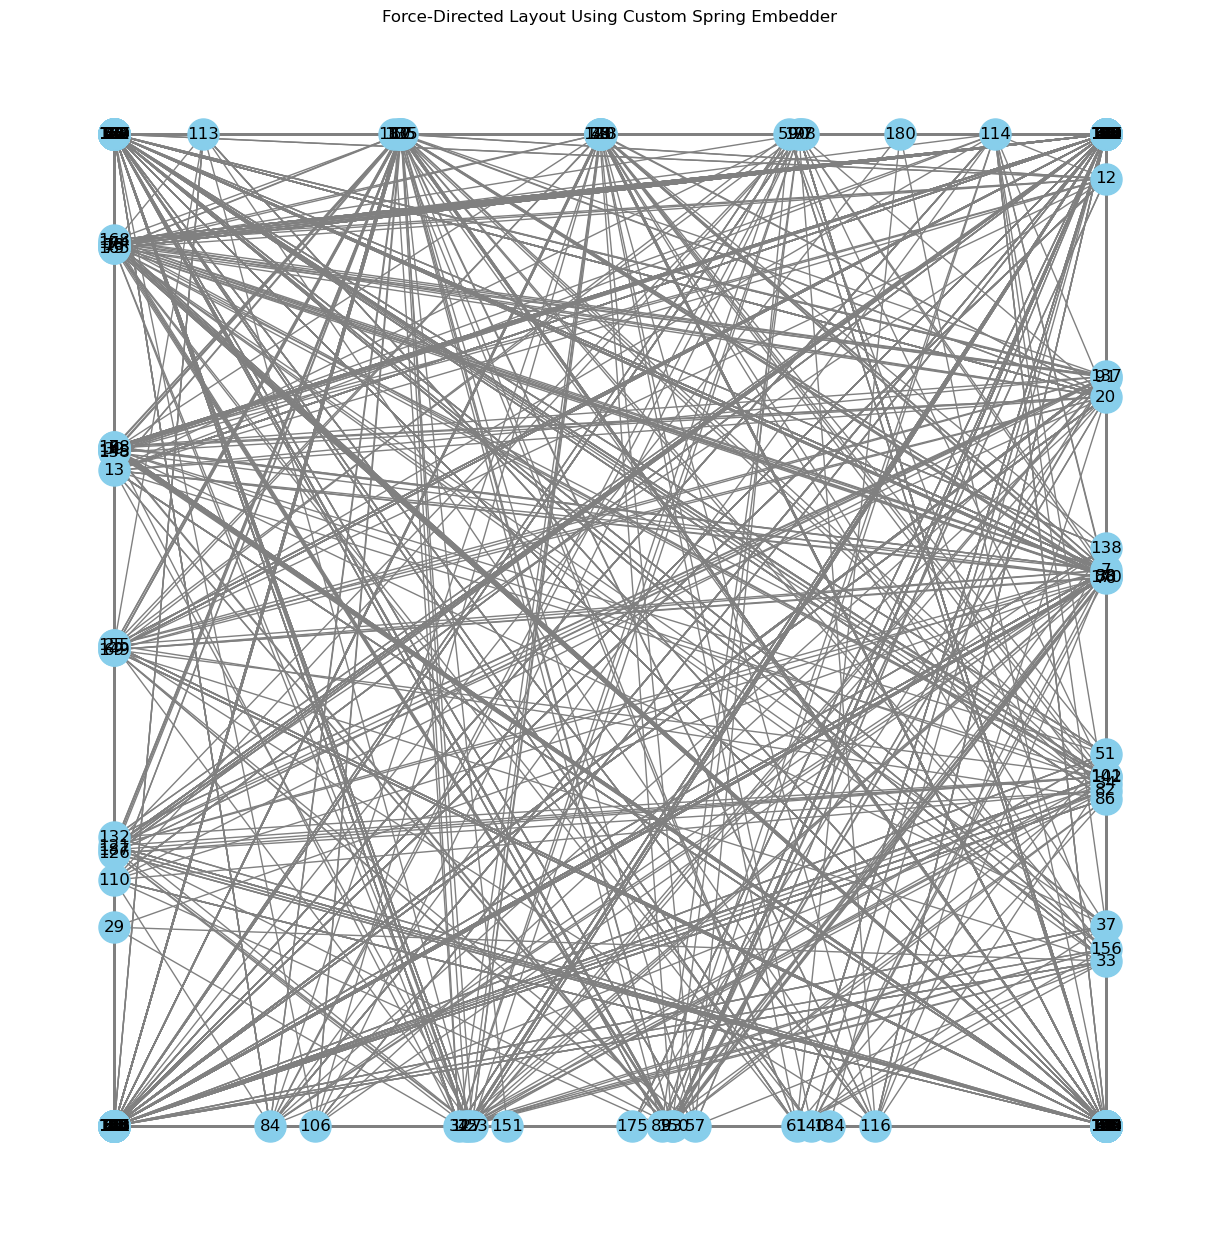

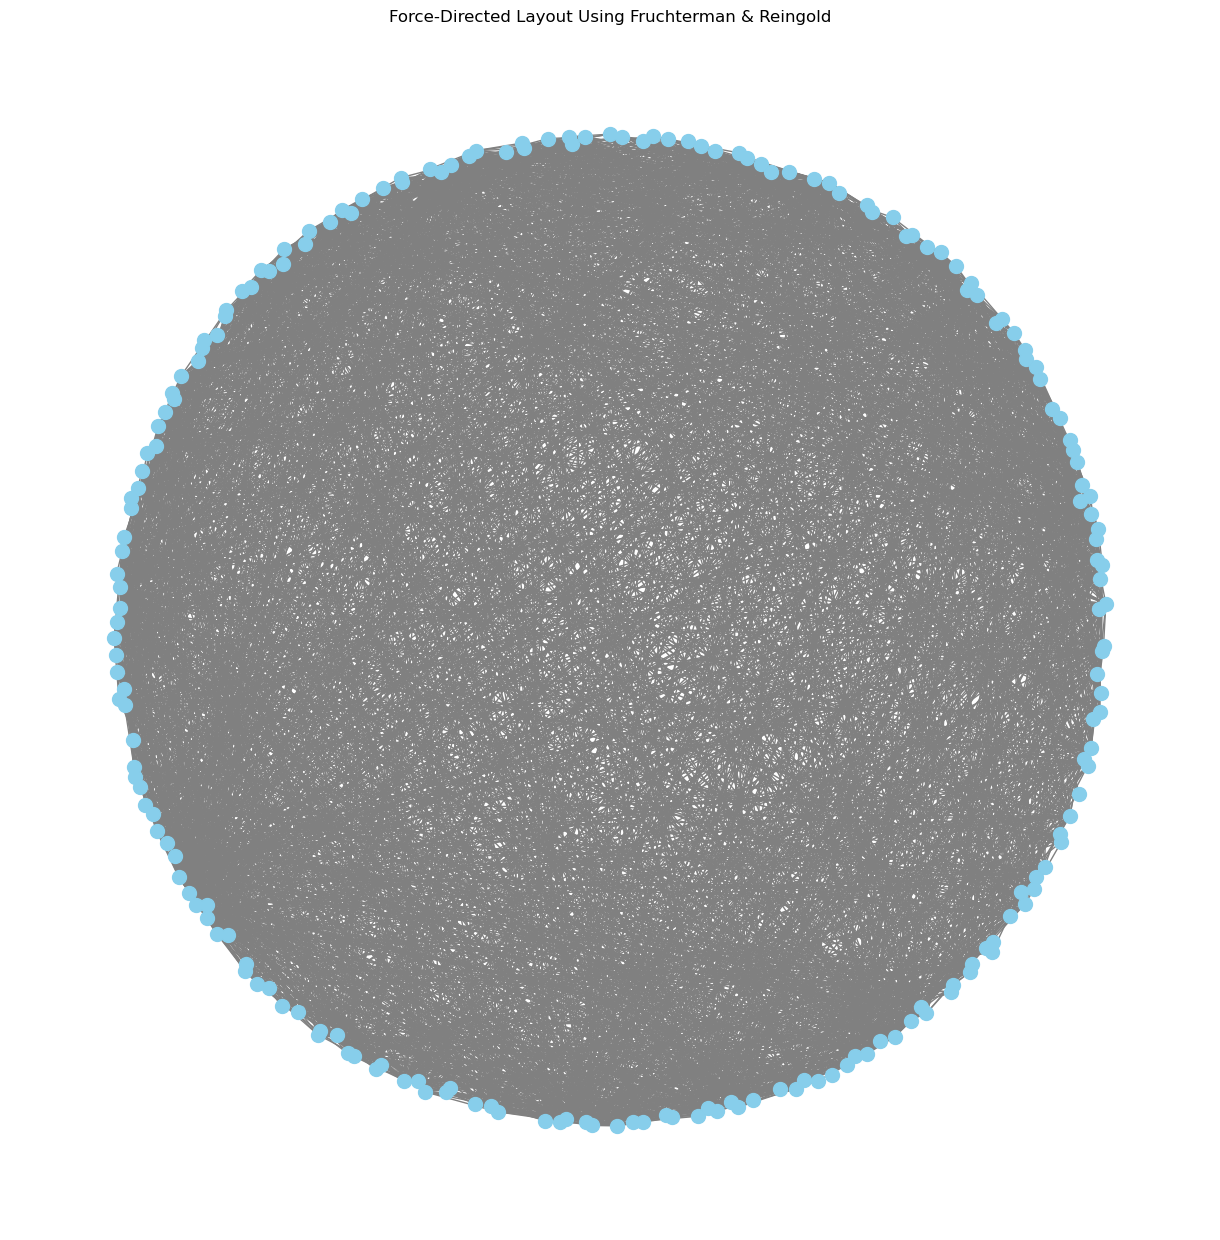

it took 86.83397459983826


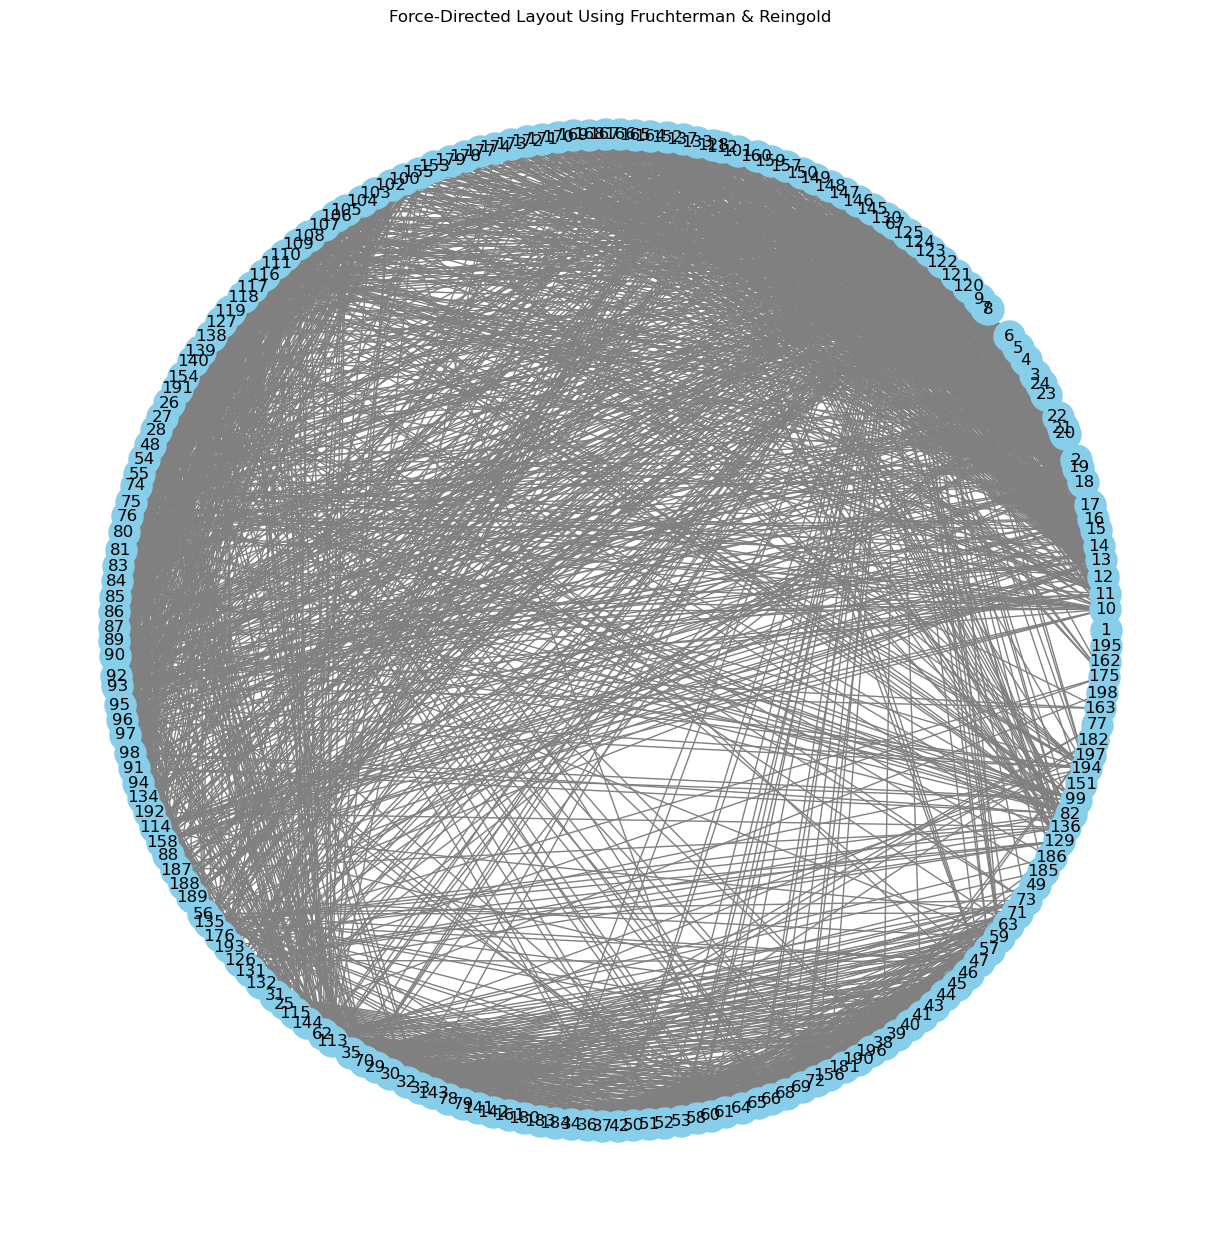

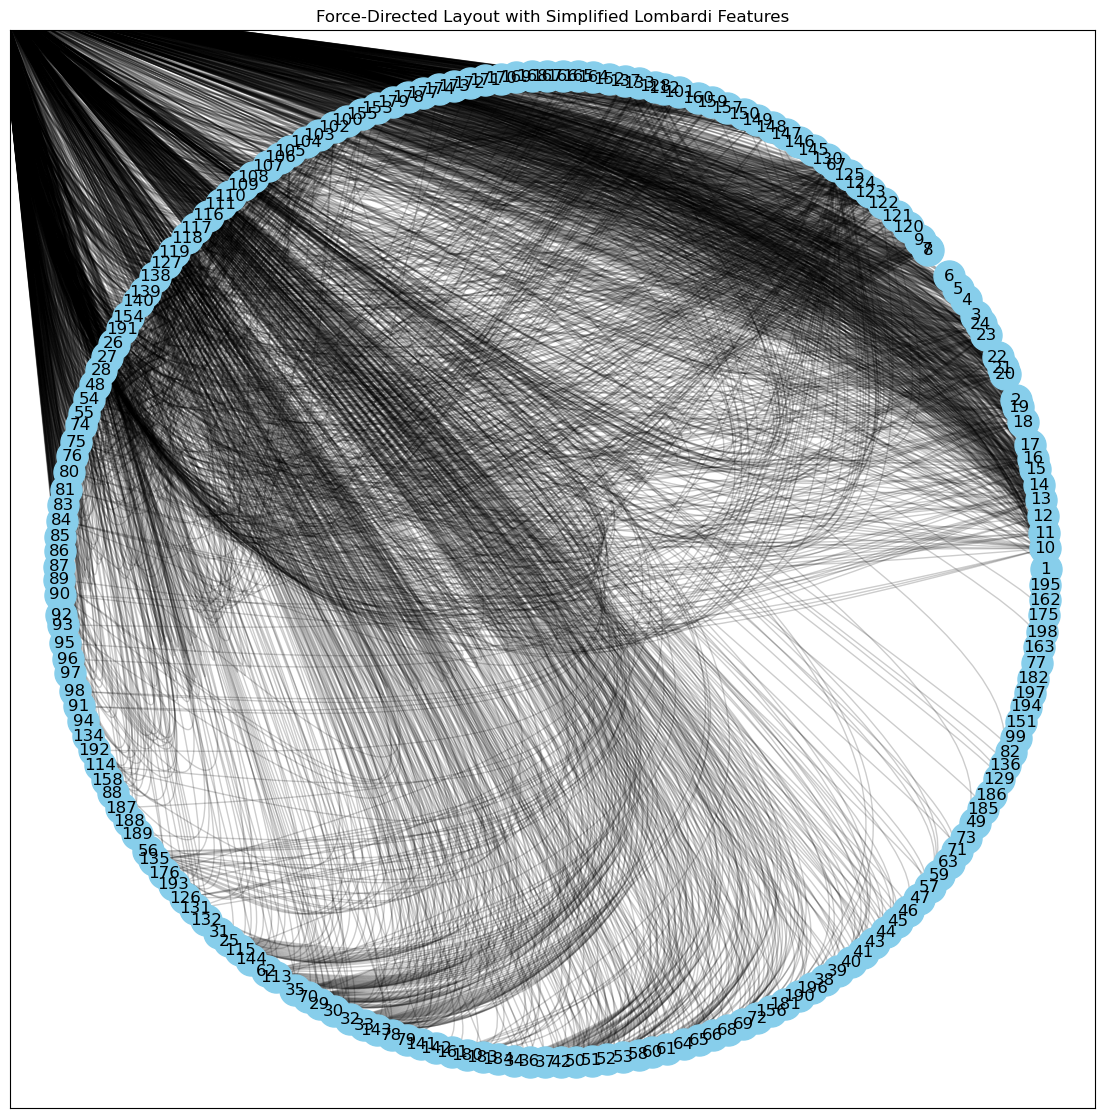

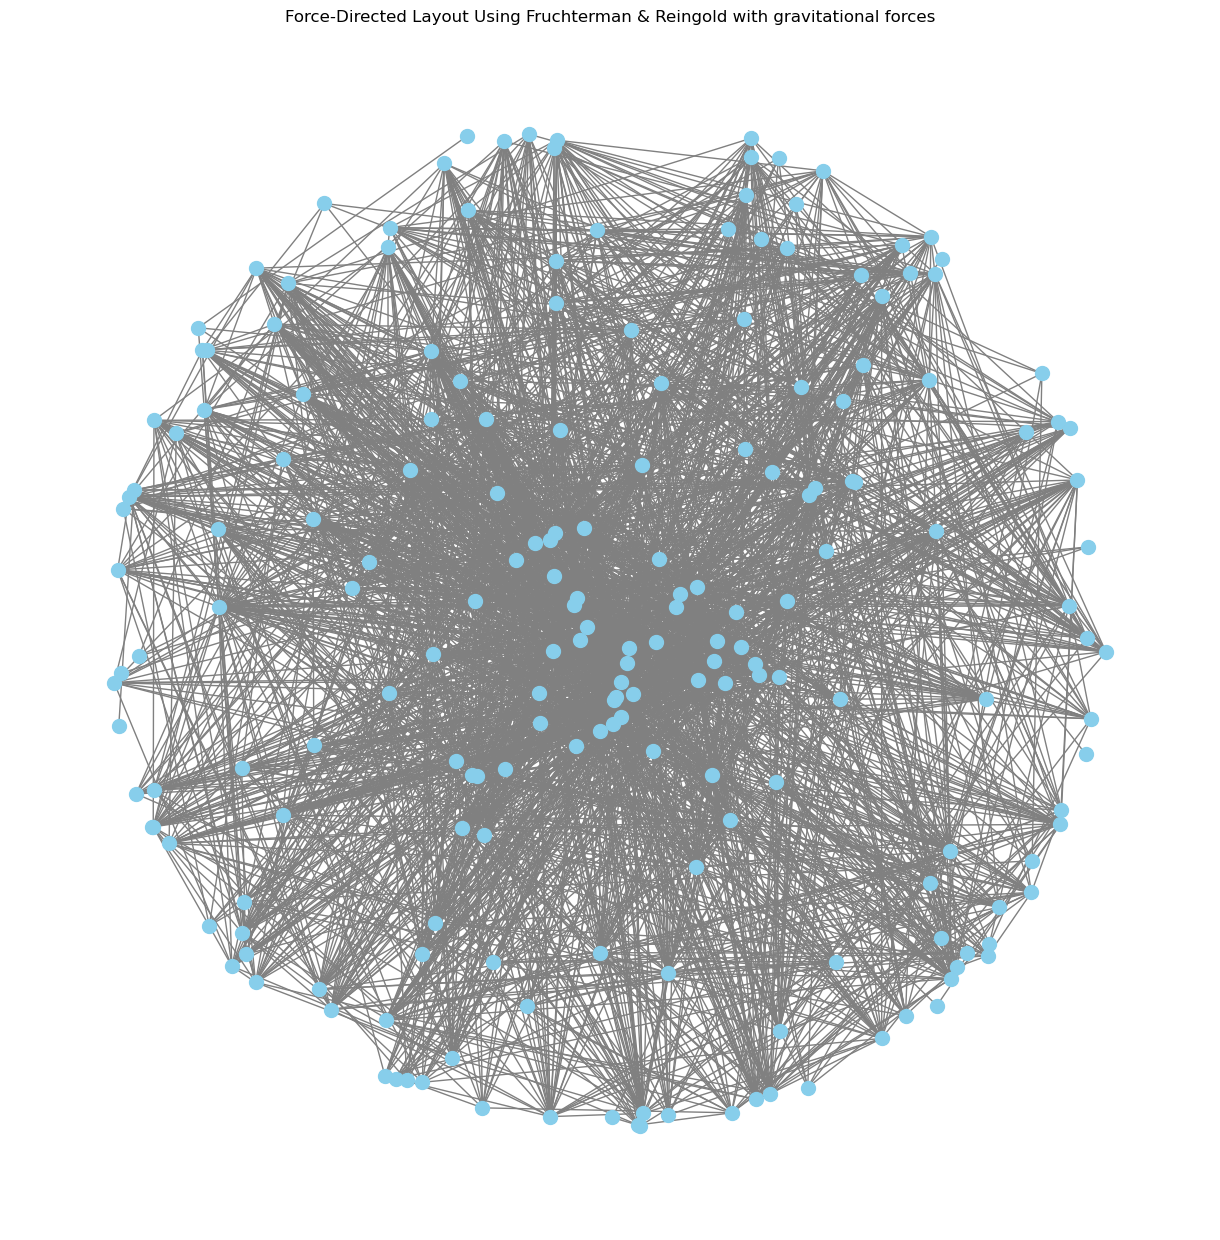

In [3]:
import import_ipynb
from step3 import fruchterman_reingold

## Defining two subgraphs as mentioned in step 5 description 

In [4]:
cluster1_nodes = [
    "n64", "n66", "n106", "n137", "n138", "n139", "n140", "n141", "n142", 
    "n143", "n144", "n145", "n146", "n147", "n148", "n149", "n249", "n250", 
    "n251", "n252", "n253", "n254", "n255", "n256", "n257", "n258", "n259", 
    "n260", "n261", "n262", "n263", "n264", "n265", "n266", "n267", "n268", 
    "n269", "n270", "n271", "n272", "n273", "n274", "n275", "n276", "n277", 
    "n278", "n279", "n280", "n281", "n282", "n283", "n284", "n285", "n286", 
    "n287", "n288", "n289", "n290", "n291", "n292", "n293", "n294", "n295", "n296"
] # Youngest Devonian Strata
cluster2_nodes = [
    "n150", "n151", "n152", "n153", "n154", "n297", "n298", "n299", "n300",
    "n301", "n302", "n303", "n304", "n305", "n306", "n307", "n308", "n309",
    "n310", "n311", "n312", "n313", "n314", "n315", "n316", "n317", "n318",
    "n319", "n320", "n321", "n322", "n323", "n324", "n325", "n326", "n327",
    "n328", "n329", "n330", "n331", "n332", "n333", "n334"
]#Gap in the Sequence of Devonshi

subgraph1 = Graph.subgraph(cluster1_nodes) 
subgraph2 = Graph.subgraph(cluster2_nodes)


pos1 = fruchterman_reingold(subgraph1, positions=None, K=100, epsilon=1e-4, delta=0.2, area=240*240, c=2)
pos2 = fruchterman_reingold(subgraph2, positions=None, K=100, epsilon=1e-4, delta=0.2, area=240*240, c=2)

# Calculate the bounding boxes for each layout
bbox1 = (min([pos[0] for pos in pos1.values()]), min([pos[1] for pos in pos1.values()]),
         max([pos[0] for pos in pos1.values()]), max([pos[1] for pos in pos1.values()]))
bbox2 = (min([pos[0] for pos in pos2.values()]), min([pos[1] for pos in pos2.values()]),
         max([pos[0] for pos in pos2.values()]), max([pos[1] for pos in pos2.values()]))


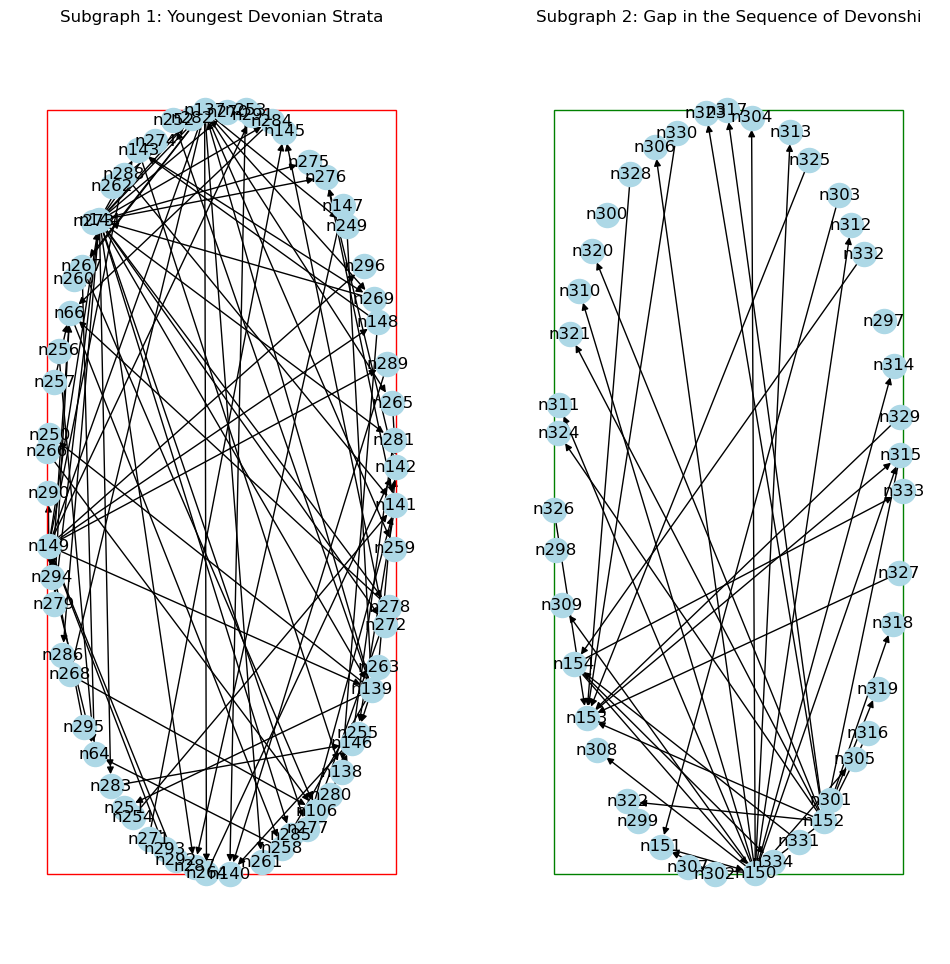

In [5]:
plt.figure(figsize=(12, 12))

plt.subplot(121)
nx.draw(subgraph1, pos1, with_labels=True, node_size=300, node_color='lightblue')

rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2] - bbox1[0], bbox1[3] - bbox1[1],
                          linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect1)
plt.title('Subgraph 1: Youngest Devonian Strata')


plt.subplot(122)
nx.draw(subgraph2, pos2, with_labels=True, node_size=300, node_color='lightblue')

rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2] - bbox2[0], bbox2[3] - bbox2[1],
                          linewidth=1, edgecolor='g', facecolor='none')
plt.gca().add_patch(rect2)
plt.title('Subgraph 2: Gap in the Sequence of Devonshi')

plt.show()


In [6]:
# inter-cluster edges
inter_cluster_edges = [(u, v) for u, v in Graph.edges() if u in cluster1_nodes and v in cluster2_nodes]
print(inter_cluster_edges)

[('n66', 'n303'), ('n66', 'n332'), ('n137', 'n304'), ('n137', 'n305'), ('n137', 'n306'), ('n137', 'n307'), ('n137', 'n308'), ('n137', 'n309'), ('n137', 'n310'), ('n137', 'n311'), ('n137', 'n312'), ('n137', 'n313'), ('n137', 'n314'), ('n139', 'n302'), ('n139', 'n303'), ('n144', 'n316'), ('n144', 'n325'), ('n144', 'n326'), ('n144', 'n327'), ('n144', 'n328'), ('n144', 'n329'), ('n144', 'n330'), ('n149', 'n331'), ('n149', 'n332')]


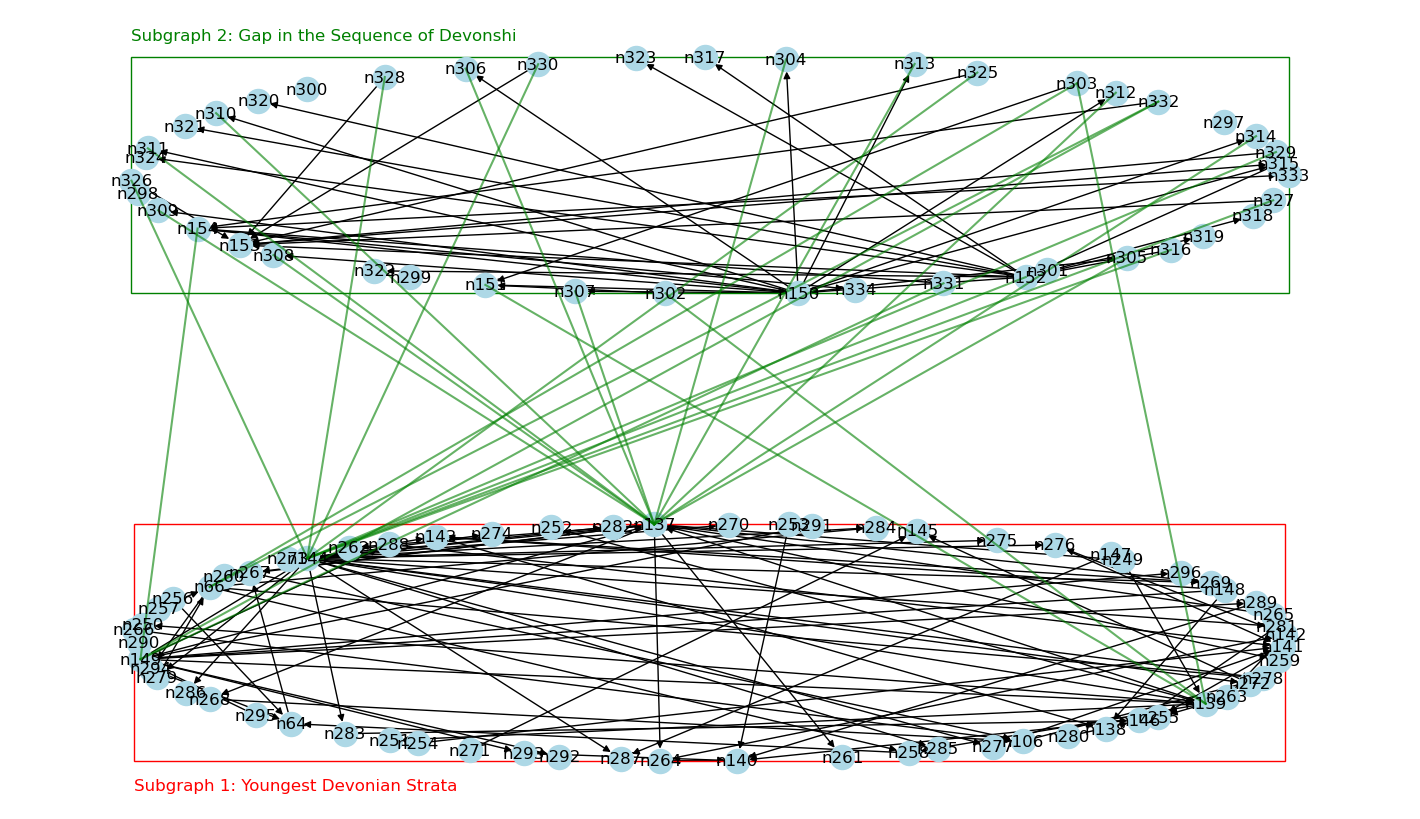

In [7]:
plt.figure(figsize=(14, 8))

#positions of subgraph2 to be above subgraph1 on the plot
shifted_pos2 = {node: (x, y + 80) for node, (x, y) in pos2.items()}  

nx.draw(subgraph1, pos1, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')


nx.draw(subgraph2, shifted_pos2, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')

# bounding boxes for subgraph1
bbox1 = patches.Rectangle((min(x for x, y in pos1.values()), min(y for x, y in pos1.values())),
                          max(x for x, y in pos1.values()) - min(x for x, y in pos1.values()),
                          max(y for x, y in pos1.values()) - min(y for x, y in pos1.values()),
                          linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(bbox1)


#bounding boxes for subgraph2
bbox2 = patches.Rectangle((min(x for x, y in shifted_pos2.values()), min(y for x, y in shifted_pos2.values())),
                          max(x for x, y in shifted_pos2.values()) - min(x for x, y in shifted_pos2.values()),
                          max(y for x, y in shifted_pos2.values()) - min(y for x, y in shifted_pos2.values()),
                          linewidth=1, edgecolor='green', facecolor='none')
plt.gca().add_patch(bbox2)


title_pos1 = (min(x for x, y in pos1.values()), min(y for x, y in pos1.values()) - 5)  # Below subgraph1
title_pos2 = (min(x for x, y in shifted_pos2.values()), max(y for x, y in shifted_pos2.values()) + 3)  # Above subgraph2

plt.text(title_pos1[0], title_pos1[1], 'Subgraph 1: Youngest Devonian Strata', fontsize=12, color='red')
plt.text(title_pos2[0], title_pos2[1], 'Subgraph 2: Gap in the Sequence of Devonshi', fontsize=12, color='green')

#inter-cluster edges
for u, v in Graph.edges():
    if u in cluster1_nodes and v in cluster2_nodes:
        if u in pos1 and v in shifted_pos2:
            plt.plot([pos1[u][0], shifted_pos2[v][0]], [pos1[u][1], shifted_pos2[v][1]], color='green', alpha=0.6)
    elif v in cluster1_nodes and u in cluster2_nodes:
        if v in pos1 and u in shifted_pos2:
            plt.plot([shifted_pos2[u][0], pos1[v][0]], [shifted_pos2[u][1], pos1[v][1]], color='green', alpha=0.6)

            
plt.axis('off')
plt.show()




## Compatibility Functions

In [22]:
def angle_compatibility(P, Q):

    # Convert to vectors
    P_vector = np.array(P[1]) - np.array(P[0])
    Q_vector = np.array(Q[1]) - np.array(Q[0])


    dot_product = np.dot(P_vector, Q_vector)

    norm_P = np.linalg.norm(P_vector)

    norm_Q = np.linalg.norm(Q_vector)

    cos_alpha = dot_product / (norm_P * norm_Q)

    Ca = abs(cos_alpha)

    return Ca

def scale_compatibility(P, Q):
    
    # edge lengths
    length_P = np.linalg.norm(np.array(P[1]) - np.array(P[0]))
    length_Q = np.linalg.norm(np.array(Q[1]) - np.array(Q[0]))
    
    avg_length = (length_P + length_Q) / 2
    
    Cs = (2 * avg_length) / (min(length_P, length_Q) + max(length_P, length_Q))
    
    return Cs

def distance_compatibility(P, Q):
    P_m = (np.array(P[1]) + np.array(P[0]))/2
    Q_m = (np.array(Q[1]) + np.array(Q[0]))/2
    
    length_P = np.linalg.norm(np.array(P[1]) - np.array(P[0]))
    length_Q = np.linalg.norm(np.array(Q[1]) - np.array(Q[0]))
    avg_length = (length_P + length_Q) / 2
    
    Cp = avg_length/(avg_length + np.linalg.norm(P_m - Q_m))
    return Cp
    
    
def project_point_onto_line(point, line_start, line_end):
    line_vec = line_end - line_start
    point_vec = point - line_start
    line_len = np.linalg.norm(line_vec)
    line_unitvec = line_vec / line_len
    projection_length = np.dot(point_vec, line_unitvec)
    return line_start + projection_length * line_unitvec

def visibility_compatibility(P, Q):
    P_m = (np.array(P[1]) + np.array(P[0]))/2
    Q_m = (np.array(Q[1]) + np.array(Q[0]))/2

    I_0 = project_point_onto_line(np.array(Q[0]), np.array(P[0]), np.array(P[1]))
    I_1 = project_point_onto_line(np.array(Q[1]), np.array(P[0]), np.array(P[1]))
    I_m = (I_0 + I_1) / 2

    length_I = np.linalg.norm(I_0 - I_1)

    vis_P_Q = max(1 - 2 * np.linalg.norm(np.array(P_m) - np.array(I_m)) / length_I, 0)

    # for vis(Q, P)
    J_0 = project_point_onto_line(np.array(P[0]), np.array(Q[0]), np.array(Q[1]))
    J_1 = project_point_onto_line(np.array(P[1]), np.array(Q[0]), np.array(Q[1]))
    J_m = (J_0 + J_1) / 2

    length_J = np.linalg.norm(J_0 - J_1)

    vis_Q_P = max(1 - 2 * np.linalg.norm(np.array(Q_m) - np.array(J_m)) / length_J, 0)

    return min(vis_P_Q, vis_Q_P)

def Ce(P, Q):
    Ce = angle_compatibility(P, Q) * scale_compatibility(P, Q) * distance_compatibility(P, Q) * visibility_compatibility(P, Q)
    return Ce

In [28]:
def subdivide_edge(edge, n_points):
    if n_points < 2:
        n_points += 2
        
    P0 = np.array(Graph.nodes[edge[0]]['pos'])
    P1 = np.array(Graph.nodes[edge[1]]['pos'])
    return [tuple(P0 + i/(n_points-1) * (P1 - P0)) for i in range(n_points)]


def apply_forces(B, E, n, kp, Ce):
    """
    Apply forces to points B and move them accordingly.

    Parameters:
    B (dict): A dictionary of points, where each point is a key and its value is its position.
    E (list): A list of edges, where each edge is a tuple of two points.
    n (int): The number of points on an edge.
    kp (float): A constant that determines the strength of the spring force.
    Ce (func): A function that calculates the edge compatibility.
    """

    # Initialize forces
    forces = {point: np.array([0.0, 0.0]) for point in B}

     # Apply spring forces
    for edge in E:
        subdivided_edge = subdivide_edge(edge, n)
        for i in range(1, len(subdivided_edge) - 1):
            forces[subdivided_edge[i]] += kp * (np.linalg.norm(B[subdivided_edge[i-1]] - B[subdivided_edge[i]]) + 
                                                 np.linalg.norm(B[subdivided_edge[i+1]] - B[subdivided_edge[i]]))

    # Apply electrostatic forces
    for edge in E:
        for i in range(1, len(edge) - 1):
            pi = edge[i]
            for other_edge in E:
                if edge != other_edge:
                    for j in range(1, len(other_edge) - 1):
                        pj = other_edge[j]
                        if pi != pj:  # Ignore self-forces
                            compatibility = Ce_function(B[pi], B[pj])
                            distance = np.linalg.norm(B[pi] - B[pj])
                            if distance > 0:  # Prevent division by zero
                                forces[pi] += compatibility * (B[pi] - B[pj]) / distance
                                
    # Update point positions
    for point in B:
        B[point] += forces[point]
    
    return B


def edge_bundling(G, edge_list, C, I_0, S_0, n_0, kp):
    B = {node: np.array(pos) for node, pos in nx.get_node_attributes(G, 'pos').items()}
    n = n_0
    
    for cycle in range(C):
        for edge in edge_list:
            B.update({point: B.get(point, np.array([0.0, 0.0])) for point in subdivide_edge(edge, n)})
        
        for _ in range(I_0):
            B = apply_forces(B, edge_list, n, kp, Ce)
        
        n *= 2  # Double the number of subdivision points
        S_0 /= 2  # Halve the step size

    # Convert B to the format required by the graph drawing function
    pos = {node: B[node].tolist() for node in B}
    return pos

# Example usage:

C = 6  # number of cycles
I_0 = 50  # initial number of iterations
S_0 = 0.04  # initial step size
n_0 = 1  # initial number of subdivisions
kp = 0.1  # spring constant

# Assume Graph and edge_list are already defined
bundled_layout = edge_bundling(Graph, edge_list, C, I_0, S_0, n_0, kp)


KeyError: 'pos'

In [32]:
# P0 = np.array(Graph.nodes[edge[0]]['pos'])
# print(P0)
Graph.nodes

NodeView(('n39', 'n76', 'n77', 'n78', 'n79', 'n80', 'n81', 'n82', 'n83', 'n84', 'n85', 'n86', 'n87', 'n88', 'n89', 'n93', 'n189', 'n190', 'n191', 'n192', 'n193', 'n194', 'n195', 'n196', 'n197', 'n198', 'n199', 'n200', 'n201', 'n202', 'n203', 'n204', 'n205', 'n206', 'n207', 'n94', 'n95', 'n96', 'n97', 'n98', 'n99', 'n100', 'n101', 'n102', 'n103', 'n104', 'n105', 'n107', 'n108', 'n109', 'n110', 'n208', 'n209', 'n210', 'n211', 'n212', 'n213', 'n214', 'n215', 'n216', 'n217', 'n218', 'n219', 'n220', 'n221', 'n222', 'n223', 'n224', 'n15', 'n19', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n41', 'n42', 'n43', 'n44', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n54', 'n55', 'n56', 'n57', 'n155', 'n156', 'n157', 'n158', 'n159', 'n160', 'n161', 'n162', 'n163', 'n164', 'n165', 'n166', 'n11', 'n21', 'n65', 'n171', 'n172', 'n173', 'n174', 'n67', 'n68', 'n69', 'n70', 'n71', 'n72', 'n73', 'n74', 'n75', 'n175', 'n176', 'n177', 'n178', 'n179', 'n180', 'n181', 'n182', 'n183', 'n184', 'n185', 